# Fazendo uma análise de dados de tweets que podem ter relação a Covid ou não
Os tweets foram minerados utilizando uma ferramenta web. Foram selecionados os tweets que haviam palavras de sintomas de covid, ou a a palavra covid

## Instalando a bibliotecas [NLTK](https://www.nltk.org/index.html) e algumas depedências dela. Também importando bibliotecas para tratar os dados como: Pandas, numpy, re, string

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np 

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('rslp')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

##Carregando a base de dados

In [ ]:
df = pd.read_excel('tweets.xlsx')

Pequena amostra da base de dados

In [ ]:
df.head(5)

,frases,classe
0,"tweet: {""Filmado em Manaus, filme 'A febre' es...",Diversos/Crítica
1,"tweet: {'@nppablin @ahspiper Capaz, ele Ã© tÃ£...",Diversos/Crítica
2,tweet: {'A Karol Conka estÃ¡ me causando nÃ¡us...,Diversos/Crítica
3,tweet: {'ATENÃ‡ÃƒO! NÃ£o sou afeito Ã febre #...,Diversos/Crítica
4,tweet: {'pf param de postar video de beijo eu ...,Ansiedade


## Funções para limpar o texto
Retirando menções por @, e também trends por #. Também foram tirados emojis

In [ ]:
def retirar_arroba(frase):
  frase = re.sub("@[A-Za-z0-9_]+","", frase)
  return frase

In [ ]:
def retirar_hashtag(frase):
  frase = re.sub("#[A-Za-z0-9_]+","", frase)
  return frase

In [ ]:
def retirar_hashtag_arroaba(coluna):
  for row in coluna:
    ind = row.find('@')
    if ind != -1:
      new = retirar_arroba(row)
      coluna.replace(row, new, inplace=True)
  for row1 in coluna:
    ind1 = row1.find('#')
    if ind1 != -1:
      new1 = retirar_hashtag(row1)
      coluna.replace(row1, new1, inplace=True)
  return coluna

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u0001f972"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
for tweet in df['frases']:
  no_emoji = remove_emoji(tweet.upper())
  df['frases'].replace(tweet, no_emoji, inplace=True)

In [ ]:
col = retirar_hashtag_arroaba(df['frases'])
df['frases'] = col

## Houve algum problema de codificação quando recebir os dados, então faço uma substituição

In [ ]:
def filtering(coluna): #Metódo para fazer o filtering automático de colunas  
  aux = 0
  for tweet in coluna: #Usando um loop for para percorrer as colunas
    tweet = tweet.replace('Ã‡', 'ç')
    tweet = tweet.replace('Ã¡', 'a')
    tweet = tweet.replace('Ã³', 'o')
    tweet = tweet.replace('Ãƒ', 'a')
    tweet = tweet.replace('Ã©', 'e')
    tweet = tweet.replace('Ã§', 'ç')
    tweet = tweet.replace('Ã£', 'a')
    tweet = tweet.replace('Ãª', 'e')
    tweet = tweet.replace('Ã¢', 'a')
    tweet = tweet.replace('í©', 'e')
    tweet = tweet.replace('Ã´', 'o')
    tweet = tweet.replace('Ã', 'i')
    tweet = tweet.replace(':', '')
    tweet = tweet.replace(';', '')
    tweet = tweet.replace('hr', 'hora')
    tweet = tweet.replace('cm', 'com')
    tweet = tweet.replace('tbm', 'tambem')
    tweet = tweet.replace('vc', 'voce')
    tweet = tweet.replace(',', '')
    tweet = tweet.replace('â€¦', '')    
    tweet = tweet.replace('/', '')
    tweet = tweet.replace('.', '')
    tweet = tweet.replace('!', '')
    tweet = tweet.replace('?', '')
    tweet = tweet.replace('{', '')
    tweet = tweet.replace('\n', '')
    tweet = tweet.replace('}', '')
    tweet = tweet.replace('\\u0001f972', '')
    tweet = tweet.replace('tweet', '')
    tweet = tweet.replace("'", '')
    tweet = tweet.lower()
    tweet_split = tweet.split('https')
    tweet = tweet_split[0]
    coluna[aux] = tweet
    aux += 1
  return coluna

In [ ]:
new_col = filtering(df['frases'])
df['frases'] = new_col

## Substituindo as classes, para apenas ter duas classes

In [ ]:
df.classe.replace(['Diversos/Crítica', 'Ansiedade', 'Ironia', 'Politização','OutrasDoenças', 'Notícias/informação', 'Vacina', 'Não-covid'], 'Não-covid', inplace=True)

In [ ]:
df.head(5)

,frases,classe
0,"""filmado em manaus filme a febre estreia na n...",Não-covid
1,capaz ele e tao bonito pra ter febre,Não-covid
2,a karol conka esta me causando nausea enjoo c...,Não-covid
3,atençao nao sou afeito i febre mas abro ex...,Não-covid
4,pf param de postar video de beijo eu tenho an...,Não-covid


## Mostrando um pouco dos dados

In [ ]:
def palavras_quantidade(df):
  string_total = ""
  for i in df.frases:
    string_total=i+" "+str(string_total)

  string_split = string_total.split()
  count_list = []

  for i in string_split:
    if i not in count_list:
      count_list.append(i)

  qntd = {}
  for i in count_list:
    num = string_total.count(i)
    qntd.update({i: num})

  new_df = pd.DataFrame({'Palavras':qntd.keys(), 'Quantidade':qntd.values()}, index=np.arange(0, len(qntd)))

  new_df.sort_values(by="Quantidade", ascending=False, inplace=True)

  new_df.reset_index(drop=True, inplace=True)

  return new_df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_theme(style="whitegrid")

Covid        4572
Não-covid    3427
Name: classe, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


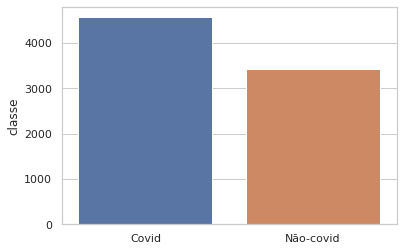

In [ ]:
x=df['classe'].value_counts()
print(x)
sns.barplot(x.index, x)

In [ ]:
df.isna().sum()

frases    0
classe    0
dtype: int64

In [ ]:
quantidade_df = palavras_quantidade(df)
quantidade_df.head()

,Palavras,Quantidade
0,a,63051
1,e,59936
2,o,47697
3,s,30960
4,r,29925


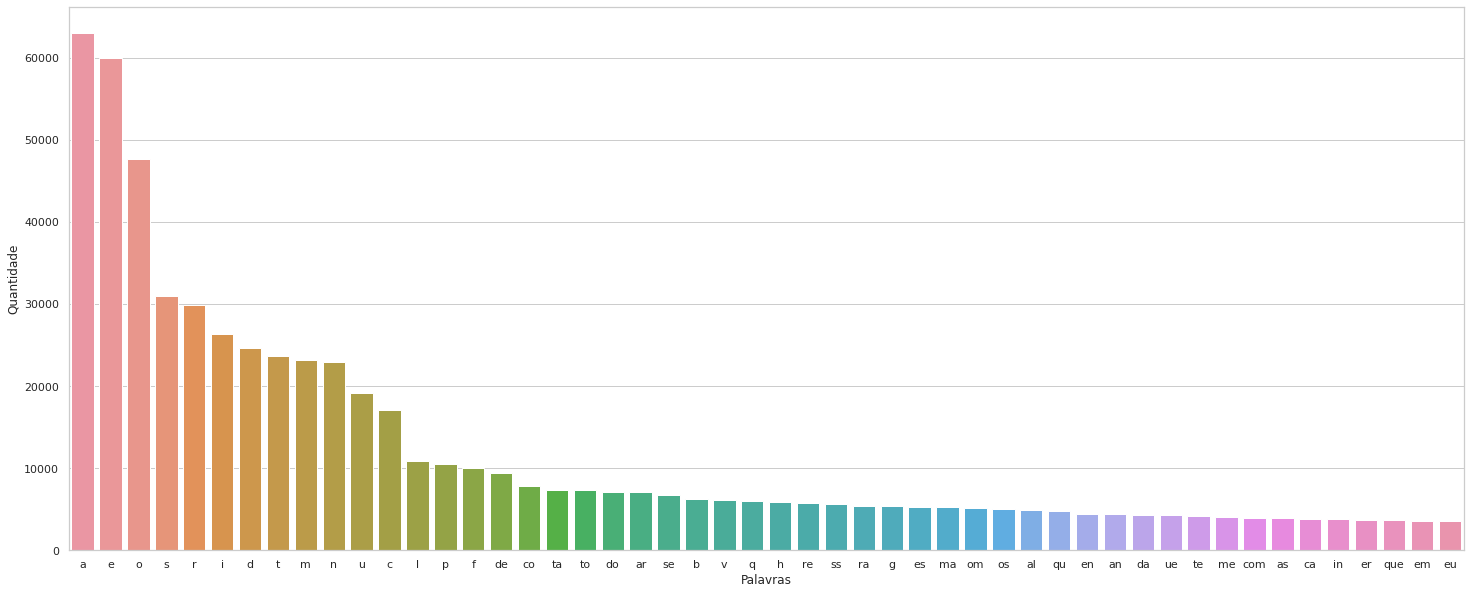

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x="Palavras", y="Quantidade", data=quantidade_df.iloc[:50])

É percepitivel que esses dados não representam muita coisa, porque as palavras são muito comuns, então vamos pegar palavras com pelo menos quatro letras

In [ ]:
df_mais_quatro_letras = pd.DataFrame()
for i in quantidade_df.Palavras:
  if len(i) > 3:
    d = quantidade_df[quantidade_df["Palavras"] == i]
    df_mais_quatro_letras= pd.concat([df_mais_quatro_letras, d])

In [ ]:
df_mais_quatro_letras.head()

,Palavras,Quantidade
61,toss,2628
63,febr,2614
64,febre,2592
65,tosse,2523
67,alta,2442


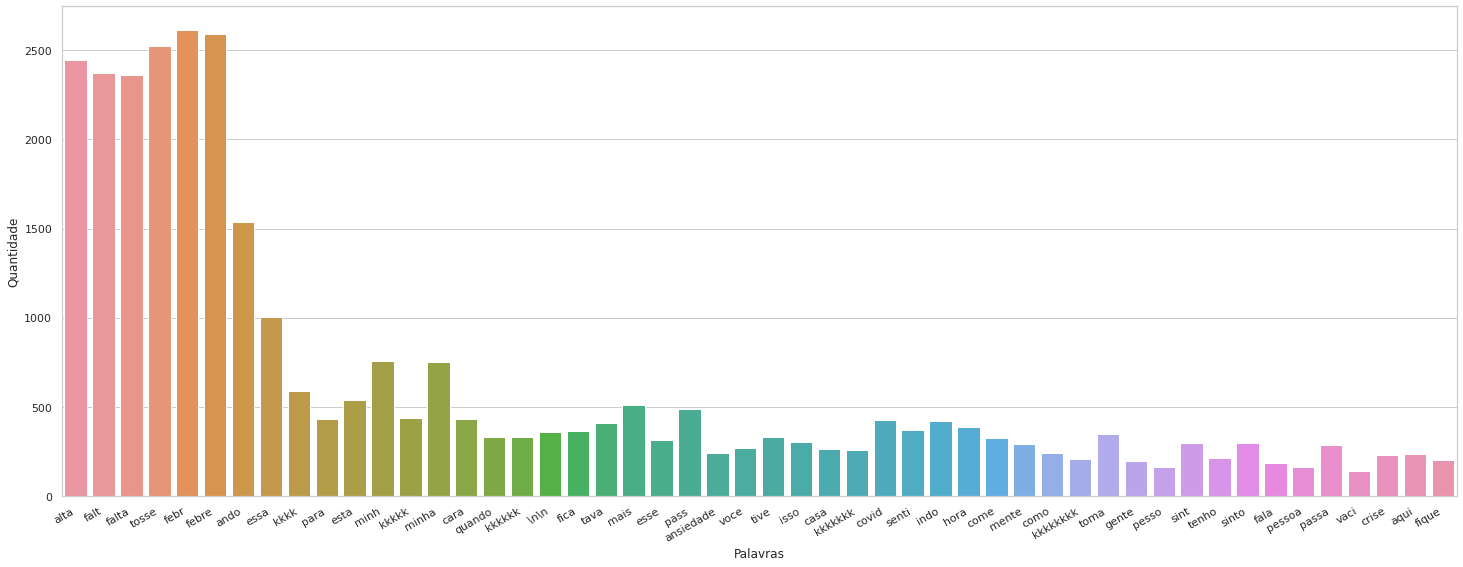

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x="Palavras", y="Quantidade", data=df_mais_quatro_letras[:50])
fig.autofmt_xdate()

Separando uma base para covid e outra para não-covid

In [ ]:
palavras_covid = df[df['classe'] == 'Covid']
palavras_nao_covid = df[df['classe'] == 'Não-covid']

In [ ]:
qntd_covid = palavras_quantidade(palavras_covid)
qntd_nao_covid = palavras_quantidade(palavras_nao_covid)

In [ ]:
qntd_covid.head()

,Palavras,Quantidade
0,a,31355
1,e,30536
2,o,24758
3,r,15290
4,s,14853


In [ ]:
qntd_nao_covid.head()

,Palavras,Quantidade
0,a,31696
1,e,29400
2,o,22939
3,s,16107
4,r,14635


Novamente as palavras mais ditas não tem muito significado, então vamos pegar palavras com mais letras

In [ ]:
df_covid = pd.DataFrame()
for i in qntd_covid.Palavras:
  if len(i) > 3:
    d = qntd_covid[qntd_covid["Palavras"] == i]
    df_covid = pd.concat([df_covid, d])

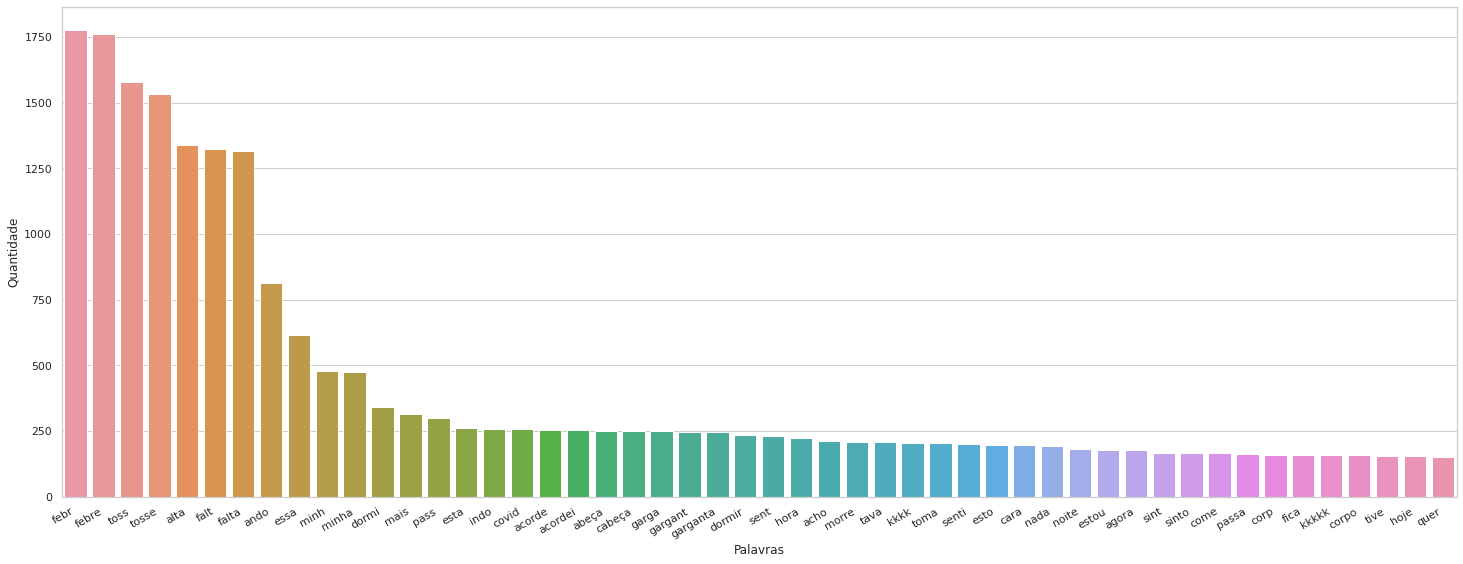

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x="Palavras", y="Quantidade", data=df_covid[:50])
fig.autofmt_xdate()

In [ ]:
df_nao_covid = pd.DataFrame()
for i in qntd_nao_covid.Palavras:
  if len(i) > 3:
    d = qntd_nao_covid[qntd_nao_covid["Palavras"] == i]
    df_nao_covid= pd.concat([df_nao_covid, d])

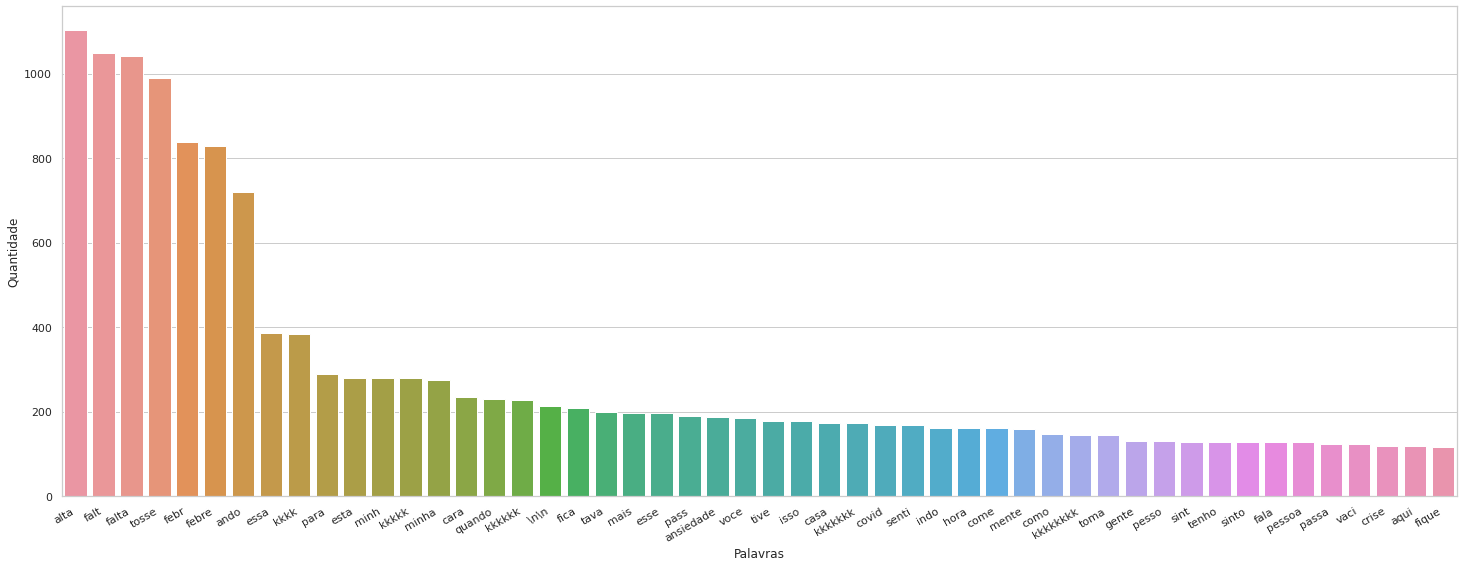

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x="Palavras", y="Quantidade", data=df_nao_covid[:50])
fig.autofmt_xdate()

Percebemos que nos dados de não covid tem a repetição de 'k's 

## Fazendo o pré processamento dos tweets

In [ ]:
#for i in range(0, len(str2)):
#  print('Frequency of', str2[i], 'is :', str.count(str2[i])) 

In [ ]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text = text.strip()  
    text = re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text)
    return text

 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in nltk.corpus.stopwords.words('portuguese')]
    return ' '.join(a)

#LEMMATIZATION
# Initialize the lemmatizer
rslp = RSLPStemmer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[rslp.stem(tag[0]) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [ ]:
textosPuros = df['frases']
frases = textosPuros.str.lower()
textosQuebrados = [nltk.tokenize.word_tokenize(frase) for frase in frases]

In [ ]:
stemmer = nltk.stem.RSLPStemmer()

dicionario = set()

for lista in textosQuebrados:
	validas = [stemmer.stem(palavra) for palavra in lista if palavra not in stopwords]
	dicionario.update(validas)

print(dicionario)

{'oq', 'roman', 'calor\\nt', 'lex', 'kon', 'pqpðÿ™', 'prq', 'fung', 'ole', 'ad', 'arri', 'i\xadru', 'sextouuu', 'tomograf', 'te', 'grav', 'vacinal\\n', 'mín', 'deixa-m', 'bbb\\nm', '\\n0525', 'staccato\\n', 'anúnci', 'mdsssss', 'manifestaça', 'palitoy', 'morte\\nm', 'wald', '\\u0001f971', 'vind', 'flor', 'amoreh', 'cima\\nsu', 'daqu', 'duz', 'kan', 'bemna', 'mal-est', 'mem', 'ðÿ™ˆ', 'scuol', 'cult', 'arromb', 'recep', 'trégu', 'ia', 'me', 'fodm', 'coviiiid', 'ikk', 'evita', 'doeu', 'opa', 'concert', 'cha\\naliv', 'ho', 'trá', 'moç', 'cim', 'sono\\n\\nmu', 'pfvr', '€', '378', 'predi', 'sorvet', 'tmnc\\u0001f92f', 'angiºst', 'reaç', 'lem', 'pescoç', 'eles…', 'morr', 'dougl', 'tiºnel', 'negacionista…', 'deusksksksskksksk', 'cerc', 'hyp', 'tosse\\nq', 'alemanh', '156kg', 'giur', 'rapidotom', 'alvej', 'enrol', 'â€œ\\n\\n', 'astrazenec', 'engasgou-s', 'ðÿ˜¨ðÿ˜¨ðÿ˜¨', '\\nâ€œna', 'terri\xad', 'obje', 'amb', 'esquisit', 'rinite\\n', 'má', 'grip', 'fes-th', 'irritaça', 'â€œc', 'alopec', 'avant'

In [ ]:
df['clean_text'] = df['frases'].apply(lambda x: lemmatizer(x))
df.head()

,frases,classe,clean_text
0,"""filmado em manaus filme a febre estreia na n...",Não-covid,`` film em manau film a febr estre na netflix
1,capaz ele e tao bonito pra ter febre,Não-covid,capaz ele e tao bonit pra ter febr
2,a karol conka esta me causando nausea enjoo c...,Não-covid,a karol conk est me caus nause enjo calafri er...
3,atençao nao sou afeito i febre mas abro ex...,Não-covid,atença nao sou afeit i febr mas abr exceça par...
4,pf param de postar video de beijo eu tenho an...,Não-covid,pf par de post vide de beij eu tenh ansiedad p...


In [ ]:
df.classe.replace("Não-covid", 1, inplace=True)
df.classe.replace("Covid", 0, inplace=True)

In [ ]:
df.head()

,frases,classe,clean_text
0,"""filmado em manaus filme a febre estreia na n...",1,`` film em manau film a febr estre na netflix
1,capaz ele e tao bonito pra ter febre,1,capaz ele e tao bonit pra ter febr
2,a karol conka esta me causando nausea enjoo c...,1,a karol conk est me caus nause enjo calafri er...
3,atençao nao sou afeito i febre mas abro ex...,1,atença nao sou afeit i febr mas abr exceça par...
4,pf param de postar video de beijo eu tenho an...,1,pf par de post vide de beij eu tenh ansiedad p...


In [ ]:
#for word embedding
import gensim
from gensim.models import Word2Vec

In [ ]:
# create Word2vec model
#here words_f should be a list containing words from each document. say 1st row of the list is words from the 1st document/sentence
#length of words_f is number of documents/sentences in your dataset
df['clean_text_tok']=[nltk.word_tokenize(i) for i in df['clean_text']] #convert preprocessed sentence to tokenized sentence
model = Word2Vec(df['clean_text_tok'],min_count=1)  #min_count=1 means word should be present at least across all documents,
#if min_count=2 means if the word is present less than 2 times across all the documents then we shouldn't consider it


w2v = dict(zip(model.wv.index2word, model.wv.syn0))  #combination of word and its vector

#for converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  if __name__ == '__main__':


## Dividindo a base de dados - em treino e teste

In [ ]:
#for model-building
from sklearn.model_selection import train_test_split

In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION
 
# Input: "reviewText", "rating" and "time"
# Target: "log_votes"
X_train, X_val, y_train, y_val = train_test_split(df["clean_text"],
                                                  df["classe"],
                                                  test_size=0.2,
                                                  random_state = 0
                                                  )
X_train_tok = [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok = [nltk.word_tokenize(i) for i in X_val]      #for word2vec

In [ ]:
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will 
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible


#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

In [ ]:
pd.DataFrame(X_train_vectors_w2v) 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.628191,0.578054,0.642617,-0.387069,0.022456,-0.325994,-0.196167,0.347673,-0.225978,0.334636,...,-0.039575,-0.386250,0.388878,0.746983,-0.349834,0.899265,-0.204051,-0.534155,0.440309,-0.215672
1,-0.552750,0.523961,0.625662,-0.387155,0.023398,-0.307160,-0.175851,0.313554,-0.239252,0.308761,...,-0.040106,-0.364330,0.371276,0.713086,-0.324106,0.876030,-0.203225,-0.499529,0.421450,-0.178978
2,-0.376313,0.366411,0.413866,-0.256259,0.011822,-0.191560,-0.113032,0.205939,-0.151273,0.209701,...,-0.019262,-0.236060,0.263674,0.478579,-0.224510,0.559349,-0.144537,-0.333794,0.278505,-0.104948
3,-0.517598,0.479820,0.573839,-0.370684,0.026361,-0.286080,-0.183070,0.290834,-0.234428,0.301240,...,-0.014806,-0.352620,0.360973,0.652865,-0.307749,0.785511,-0.195622,-0.454912,0.395633,-0.177717
4,-0.375255,0.347400,0.479134,-0.298409,0.008213,-0.217408,-0.127629,0.233531,-0.203877,0.213495,...,-0.061917,-0.282965,0.249385,0.546391,-0.230863,0.709510,-0.142850,-0.353398,0.323353,-0.092390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,-0.586957,0.534091,0.761509,-0.454513,0.003931,-0.327663,-0.193680,0.371890,-0.316661,0.338383,...,-0.097676,-0.440199,0.391156,0.841630,-0.357858,1.094242,-0.217611,-0.551218,0.526390,-0.127512
6395,-0.539919,0.510018,0.641133,-0.412254,0.019073,-0.304774,-0.181995,0.323268,-0.276577,0.312931,...,-0.053847,-0.390555,0.375315,0.737292,-0.321191,0.929826,-0.205992,-0.489732,0.440854,-0.143541
6396,-0.533492,0.515116,0.515553,-0.320041,0.024914,-0.256183,-0.133052,0.289620,-0.153846,0.260792,...,-0.029408,-0.284287,0.356857,0.638103,-0.289384,0.680471,-0.192368,-0.434433,0.365086,-0.147835
6397,-0.468357,0.444317,0.566619,-0.350274,0.011666,-0.266108,-0.161111,0.266949,-0.238858,0.280709,...,-0.038033,-0.335110,0.321031,0.631543,-0.283779,0.802074,-0.177220,-0.437264,0.378888,-0.144102


In [ ]:
pd.DataFrame(X_train_vectors_tfidf.toarray()) 

,0,1,2,3,4,5,6,7,8,9,...,6581,6582,6583,6584,6585,6586,6587,6588,6589,6590
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.DataFrame(X_train_vectors_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names()) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,01,02,0200,0203,0337,0338,0342,039,040122,0420,...,œðÿ_x008f_,œðÿ_x008f_¼,šrsrsr,žnor,žâœœï,žðÿ,žðÿ_x008f_¼,žðÿ_x008f_¾ðÿ,ˆðÿ,ˆðÿ_x008f_½
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Criando os modelos de classificação dos dados

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       957
           1       0.73      0.69      0.71       643

    accuracy                           0.77      1600
   macro avg       0.76      0.76      0.76      1600
weighted avg       0.77      0.77      0.77      1600

Confusion Matrix: [[792 165]
 [198 445]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


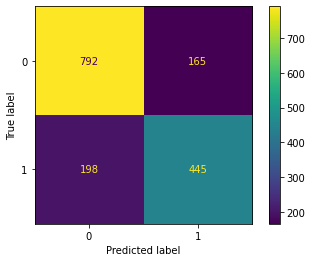

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1).fit(X_train_vectors_tfidf, y_train)

y_predict = clf.predict(X_val_vectors_tfidf)

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

plot_confusion_matrix(clf, X_val_vectors_tfidf, y_val)

In [ ]:
from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train_vectors_tfidf, y_train)

y_predict = clf.predict(X_val_vectors_tfidf)
 
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))


              precision    recall  f1-score   support

           0       0.82      0.79      0.80       957
           1       0.70      0.75      0.72       643

    accuracy                           0.77      1600
   macro avg       0.76      0.77      0.76      1600
weighted avg       0.77      0.77      0.77      1600

Confusion Matrix: [[752 205]
 [162 481]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


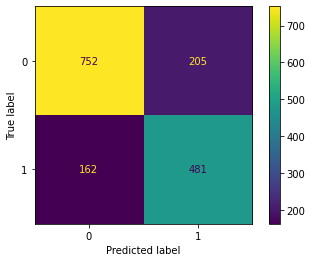

In [ ]:
plot_confusion_matrix(clf, X_val_vectors_tfidf, y_val)

In [ ]:
clf_w2v = Perceptron(tol=1e-3, random_state=0)
clf_w2v.fit(X_train_vectors_w2v, y_train)

y_predict = clf_w2v.predict(X_val_vectors_w2v)
 
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.46      0.60       957
           1       0.53      0.89      0.66       643

    accuracy                           0.63      1600
   macro avg       0.69      0.68      0.63      1600
weighted avg       0.73      0.63      0.62      1600

Confusion Matrix: [[441 516]
 [ 71 572]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


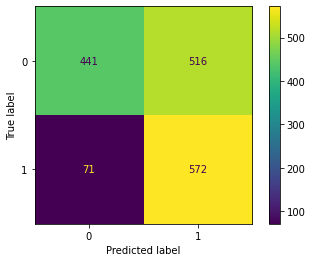

In [ ]:
plot_confusion_matrix(clf_w2v, X_val_vectors_w2v, y_val)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       957
           1       0.76      0.74      0.75       643

    accuracy                           0.80      1600
   macro avg       0.80      0.79      0.79      1600
weighted avg       0.80      0.80      0.80      1600

Confusion Matrix: [[808 149]
 [167 476]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


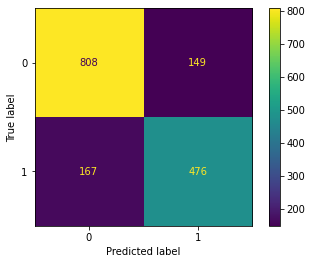

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_vectors_tfidf, y_train)

#Predict y value for test dataset
y_predict = lr.predict(X_val_vectors_tfidf)
y_prob = lr.predict_proba(X_val_vectors_tfidf)[:,1]
 
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
plot_confusion_matrix(lr, X_val_vectors_tfidf, y_val)

In [ ]:
lr_w2v = LogisticRegression()
lr_w2v.fit(X_train_vectors_w2v, y_train)

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]
 
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       957
           1       0.66      0.61      0.64       643

    accuracy                           0.72      1600
   macro avg       0.71      0.70      0.70      1600
weighted avg       0.72      0.72      0.72      1600

Confusion Matrix: [[759 198]
 [250 393]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


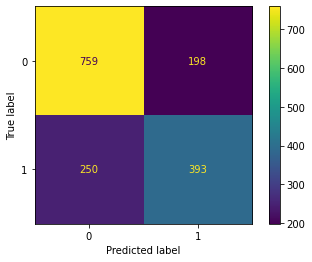

In [ ]:
plot_confusion_matrix(lr_w2v, X_val_vectors_w2v, y_val)

In [ ]:
lr_2 = LogisticRegression(penalty = 'l2', C = 5, solver = 'liblinear')
lr_2.fit(X_train_vectors_tfidf, y_train)

#Predict y value for test dataset
y_predict = lr_2.predict(X_val_vectors_tfidf)
y_prob = lr_2.predict_proba(X_val_vectors_tfidf)[:,1]
 
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       957
           1       0.78      0.76      0.77       643

    accuracy                           0.82      1600
   macro avg       0.81      0.81      0.81      1600
weighted avg       0.82      0.82      0.82      1600

Confusion Matrix: [[822 135]
 [157 486]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


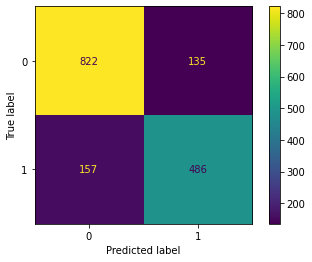

In [ ]:
plot_confusion_matrix(lr_2, X_val_vectors_tfidf, y_val)

In [ ]:
print(f"Acuracia: {accuracy_score(y_val, y_predict)}")
print(f"Acurácia balanceada: {balanced_accuracy_score(y_val, y_predict)}")

Acuracia: 0.8175
Acurácia balanceada: 0.8073831033020179


In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(w2v)

lr_w2v_2=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v_2.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       957
           1       0.66      0.61      0.64       643

    accuracy                           0.72      1600
   macro avg       0.71      0.70      0.70      1600
weighted avg       0.72      0.72      0.72      1600

Confusion Matrix: [[759 198]
 [250 393]]


In [ ]:
print(f"Acuracia: {accuracy_score(y_val, y_predict)}")
print(f"Acurácia balanceada: {balanced_accuracy_score(y_val, y_predict)}")

Acuracia: 0.72
Acurácia balanceada: 0.7021504799699684


In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
#It's a probabilistic classifier that makes use of Bayes' Theorem, a rule that uses probability to make predictions based on prior knowledge of conditions that might be related. This algorithm is the most suitable for such large dataset as it considers each feature independently, calculates the probability of each category, and then predicts the category with the highest probability.

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       957
           1       0.84      0.52      0.65       643

    accuracy                           0.77      1600
   macro avg       0.79      0.73      0.74      1600
weighted avg       0.79      0.77      0.76      1600

Confusion Matrix: [[895  62]
 [306 337]]


In [ ]:
print(f"Acuracia: {accuracy_score(y_val, y_predict)}")
print(f"Acurácia balanceada: {balanced_accuracy_score(y_val, y_predict)}")

Acuracia: 0.77
Acurácia balanceada: 0.7296599826765537


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(w2v)
#It's a probabilistic classifier that makes use of Bayes' Theorem, a rule that uses probability to make predictions based on prior knowledge of conditions that might be related. This algorithm is the most suitable for such large dataset as it considers each feature independently, calculates the probability of each category, and then predicts the category with the highest probability.

nb_w2v = GaussianNB()
nb_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = nb_w2v.predict(X_val_vectors_w2v)
y_prob = nb_w2v.predict_proba(X_val_vectors_w2v)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65       957
           1       0.51      0.63      0.57       643

    accuracy                           0.61      1600
   macro avg       0.61      0.62      0.61      1600
weighted avg       0.63      0.61      0.62      1600

Confusion Matrix: [[575 382]
 [238 405]]


In [ ]:
lr = LogisticRegression()
lr.fit(X_train_vectors_tfidf, y_train)

#Predict y value for test dataset
y_predict = lr.predict(X_val_vectors_tfidf)
y_prob = lr.predict_proba(X_val_vectors_tfidf)[:,1]
 
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       957
           1       0.76      0.74      0.75       643

    accuracy                           0.80      1600
   macro avg       0.80      0.79      0.79      1600
weighted avg       0.80      0.80      0.80      1600

Confusion Matrix: [[808 149]
 [167 476]]
